In [1]:
import random
import sys

import numpy as np
import matplotlib.pyplot as plt
from itertools import compress

# Bokeh imports
from bokeh.io import output_notebook, show, save
from bokeh.plotting import figure, output_file, ColumnDataSource, reset_output
from bokeh.models import HoverTool
output_notebook()

from ipywidgets.widgets import Text

#scipy constants
from scipy.constants import Boltzmann as kB
from scipy.constants import Avogadro as NA
from scipy.constants import Planck as h
from scipy.constants import speed_of_light as c0
from scipy.constants import R

sys.path.append('../CNT-SIM/')
from CNTSimFile import CNTSimFile
from mc_sim import exciton_sim_4_level, exciton_sim_4_lvl_full_exchange

Loading BokehJS ...

In [2]:
def atof(text):
    try:
        retval = float(text)
    except ValueError:
        retval = text
    return retval

def human_sorting(text):
    '''
    alist.sort(key=natural_keys) sorts in human order
    http://nedbatchelder.com/blog/200712/human_sorting.html
    (See Toothy's implementation in the comments)
    float regex comes from https://stackoverflow.com/a/12643073/190597
    '''
    return [ atof(c) for c in re.findall("[-+]?[.]?[\d]+(?:,\d\d\d)*[\.]?\d*(?:[eE][-+]?\d+)?", text) ]

In [3]:
import os
files = os.listdir('../sim_output/')
files = [r'../sim_output/' + f
         for f in files if '2020-05-11_exciton_sim_4_level-def'
         in f if f.endswith('.h5')]

In [4]:
kin_const=[]

In [5]:
files

['../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-30000000000.0_k_r-20000000000.0_3.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-10000000000.0_9.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-30000000000.0_k_r-10000000000.0_11.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-15000000000.0_6.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-30000000000.0_k_r-9500000000.0_15.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-20000000000.0_1.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-20000000000.0_2.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-9500000000.0_14.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-9500000000.0_13.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-20000000000.0_k_r-9500000000.0_16.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-de

In [6]:
import re
def natural_key(string_):
    return [int(s) if s.isdigit() else s for s in re.split(r'(\d+)', string_)]

In [7]:
files = sorted(files, key=natural_key)
files = sorted(files, key= human_sorting)

In [8]:
files

['../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-20000000000.0_1.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-15000000000.0_5.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-10000000000.0_9.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-50000000000.0_k_r-9500000000.0_13.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-20000000000.0_2.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-15000000000.0_6.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-10000000000.0_10.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-40000000000.0_k_r-9500000000.0_14.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-30000000000.0_k_r-20000000000.0_3.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-def-k_ed-30000000000.0_k_r-15000000000.0_7.h5',
 '../sim_output/2020-05-11_exciton_sim_4_level-de

In [9]:
CNT_sims = [CNTSimFile(i, kin_const) for i in files]

../CNT-SIM/CNTSimFile.py:30: UserWarning: File already exists, kinetic constants ingored.
  warn("File already exists, kinetic constants ingored.")


Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.
Existing file loaded successfully.


Text(0, 0.5, 'QY(E11) / %')

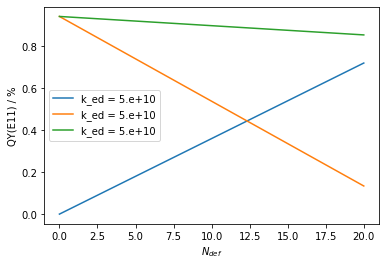

In [10]:
plt.plot(CNT_sims[0].calc_dict['n_defects'], CNT_sims[0].QY[:, 0]*100,
         label=f'k_ed = {np.format_float_scientific(CNT_sims[0].kin_const[5])}')
plt.plot(CNT_sims[0].calc_dict['n_defects'], CNT_sims[0].QY[:, 1]*100,
         label=f'k_ed = {np.format_float_scientific(CNT_sims[0].kin_const[5])}')
plt.plot(CNT_sims[0].calc_dict['n_defects'], CNT_sims[0].QY[:, 1]*100+CNT_sims[0].QY[:, 0]*100,
         label=f'k_ed = {np.format_float_scientific(CNT_sims[0].kin_const[5])}')
plt.legend()
plt.xlabel('$N_{def}$')
plt.ylabel('QY(E11) / %')

In [11]:
CNT_cube = np.zeros((4, 4, 6))

In [12]:
# E11* no defects
np.array([sim.QY[0, 0] for sim in CNT_sims])

# E11 no defects
np.array([sim.QY[0, 1] for sim in CNT_sims])

array([0.00942, 0.00896, 0.00944, 0.00994, 0.0088 , 0.00922, 0.00986,
       0.0094 , 0.00812, 0.00858, 0.0093 , 0.00856, 0.00874, 0.00774,
       0.00676, 0.00704], dtype=float32)

In [13]:
# E11* 20 defects
np.array([sim.QY[1, 0] for sim in CNT_sims])

# E11 20 defects
np.array([sim.QY[1, 1] for sim in CNT_sims])

array([0.00134, 0.00096, 0.00078, 0.00072, 0.00214, 0.00148, 0.00088,
       0.0008 , 0.00284, 0.00188, 0.00122, 0.0009 , 0.006  , 0.0033 ,
       0.00126, 0.00124], dtype=float32)

In [14]:
CNT_cube[:, :, 0] = np.array([sim.QY[0, 0] for sim in CNT_sims]).reshape((4, 4))
CNT_cube[:, :, 1] = np.array([sim.QY[0, 1] for sim in CNT_sims]).reshape((4, 4))
CNT_cube[:, :, 2] = np.array([sim.QY[1, 0] for sim in CNT_sims]).reshape((4, 4))
CNT_cube[:, :, 3] = np.array([sim.QY[1, 1] for sim in CNT_sims]).reshape((4, 4))
CNT_cube[:, :, 4] = np.array([sim.kin_const[0] for sim in CNT_sims]).reshape((4, 4))
CNT_cube[:, :, 5] = np.array([sim.kin_const[5] for sim in CNT_sims]).reshape((4, 4))

In [15]:
CNT_cube[:, :, 5]

array([[4.9999999e+10, 4.9999999e+10, 4.9999999e+10, 4.9999999e+10],
       [4.0000000e+10, 4.0000000e+10, 4.0000000e+10, 4.0000000e+10],
       [3.0000001e+10, 3.0000001e+10, 3.0000001e+10, 3.0000001e+10],
       [2.0000000e+10, 2.0000000e+10, 2.0000000e+10, 2.0000000e+10]])

In [16]:
exciton_sim_4_level??

In [17]:
CNT_sims[0].kin_const

array([2.0000000e+10, 2.0000000e+10, 1.0000000e+10, 1.0000000e+10,
       1.7403974e+09, 4.9999999e+10, 1.0000000e+09, 0.0000000e+00],
      dtype=float32)

In [18]:
def colorbar(mappable, clabel=None):
    """Sets all parameter for the colorbar and sets it next to the
    mappable image. The colorbar is scaled so the AxesImage is not
    distorted.

    Parameters
    ----------
    mappable : AxesImage
        An AxesImage object as returned by plt.imshow for instance.

    Returns
    -------
    colorbar : Colorbar
        A colorbar at the righthandside of the mappable."""
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    if clabel is not None:
        return fig.colorbar(mappable, cax=cax, label=clabel)
    else:
        return fig.colorbar(mappable, cax=cax)


In [19]:
ext =[CNT_cube[0, 0, 4], CNT_cube[0, 3, 4], CNT_cube[0, 0, 5], CNT_cube[3, 0, 5]]

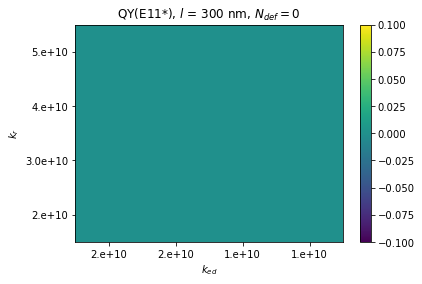

In [20]:
fig, ax = plt.subplots(1,1)

img = ax.imshow(CNT_cube[:, :, 0]*100, extent=[-1,1,-1,1], aspect='auto')

# set ticks
x_tick_list = [np.format_float_scientific(e, 0) for e in CNT_cube[0, :, 4]]
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(x_tick_list)

y_tick_list = [np.format_float_scientific(e, 1) for e in CNT_cube[:, 0, 5]]
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_yticklabels(y_tick_list)

# set labels
ax.set_ylabel('$k_{r}$')
ax.set_xlabel('$k_{ed}$')

ax.set_title('QY(E11*), $l$ = 300 nm, $N_{def} = 0$')

fig.colorbar(img)
plt.savefig(f'../../tmp/2020-05-11_exciton_sim_4_level-QY-E11*-0-def-map.png')

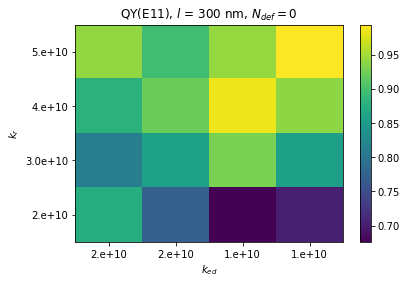

In [21]:
fig, ax = plt.subplots(1,1)

img = ax.imshow(CNT_cube[:, :, 1]*100, extent=[-1,1,-1,1], aspect='auto')

# set ticks
x_tick_list = [np.format_float_scientific(e, 0) for e in CNT_cube[0, :, 4]]
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(x_tick_list)

y_tick_list = [np.format_float_scientific(e, 1) for e in CNT_cube[:, 0, 5]]
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_yticklabels(y_tick_list)

# set labels
ax.set_ylabel('$k_{r}$')
ax.set_xlabel('$k_{ed}$')

ax.set_title('QY(E11), $l$ = 300 nm, $N_{def} = 0$')

fig.colorbar(img)
plt.savefig(f'../../tmp/2020-05-11_exciton_sim_4_level-QY-E11-0-def-map.png')

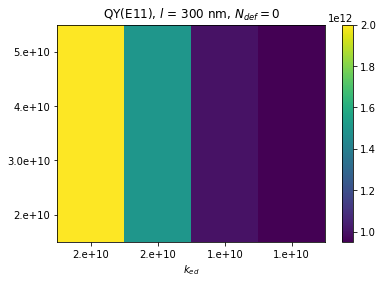

In [25]:
fig, ax = plt.subplots(1,1)

img = ax.imshow(CNT_cube[:, :, 4]*100, extent=[-1,1,-1,1], aspect='auto')

# set ticks
x_tick_list = [np.format_float_scientific(e, 0) for e in CNT_cube[0, :, 4]]
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(x_tick_list)

y_tick_list = [np.format_float_scientific(e, 1) for e in CNT_cube[:, 0, 5]]
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_yticklabels(y_tick_list)

# set labels
ax.set_xlabel('$k_{r}$')
ax.set_xlabel('$k_{ed}$')

ax.set_title('QY(E11), $l$ = 300 nm, $N_{def} = 0$')

fig.colorbar(img)
#plt.savefig(f'../../tmp/2020-05-11_exciton_sim_4_level-QY-E11-0-def-map.png')

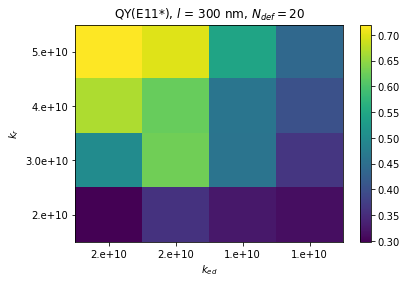

In [23]:
fig, ax = plt.subplots(1,1)

img = ax.imshow(CNT_cube[:, :, 2]*100, extent=[-1,1,-1,1], aspect='auto')

# set ticks
x_tick_list = [np.format_float_scientific(e, 0) for e in CNT_cube[0, :, 4]]
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(x_tick_list)

y_tick_list = [np.format_float_scientific(e, 1) for e in CNT_cube[:, 0, 5]]
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_yticklabels(y_tick_list)

# set labels
ax.set_ylabel('$k_{r}$')
ax.set_xlabel('$k_{ed}$')

ax.set_title('QY(E11*), $l$ = 300 nm, $N_{def} = 20$')

fig.colorbar(img)
plt.savefig(f'../../tmp/2020-05-11_exciton_sim_4_level-QY-E11*-20-def-map.png')

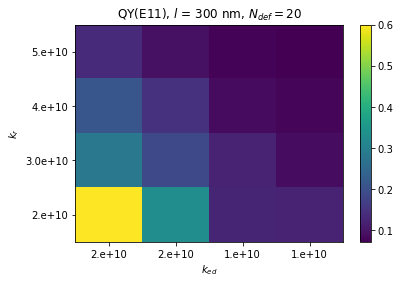

In [24]:
fig, ax = plt.subplots(1,1)

img = ax.imshow(CNT_cube[:, :, 3]*100, extent=[-1,1,-1,1], aspect='auto')

# set ticks
x_tick_list = [np.format_float_scientific(e, 0) for e in CNT_cube[0, :, 4]]
ax.set_xticks([-0.75,-0.25,0.25,0.75])
ax.set_xticklabels(x_tick_list)

y_tick_list = [np.format_float_scientific(e, 1) for e in CNT_cube[:, 0, 5]]
ax.set_yticks([0.75,0.25,-0.25,-0.75])
ax.set_yticklabels(y_tick_list)

# set labels
ax.set_ylabel('$k_{r}$')
ax.set_xlabel('$k_{ed}$')

ax.set_title('QY(E11), $l$ = 300 nm, $N_{def} = 20$')

fig.colorbar(img)
plt.savefig(f'../../tmp/2020-05-11_exciton_sim_4_level-QY-E11-20-def-map.png')